In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt

# Importing data

In [2]:
train_data = pd.read_csv('../Data/train.csv')
test_data = pd.read_csv('../Data/test.csv')
train_data.shape

(891, 12)

In [3]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Socioeconomic profile of Titanic passenger's

### Survivors per gender

In [4]:
#Survivors per gender
survivors = train_data.groupby(['Survived','Sex']).size().unstack(level=1).reset_index()
survivors['Survived'].replace(to_replace=[0, 1], value=['Perished', 'Survived'], inplace=True)
survivors.set_index('Survived', inplace=True)
#survivors.rename(columns={0: 'Deceased', 1 : 'Survived'}, inplace = True)

In [5]:
survivors

Sex,female,male
Survived,,
Perished,81,468
Survived,233,109


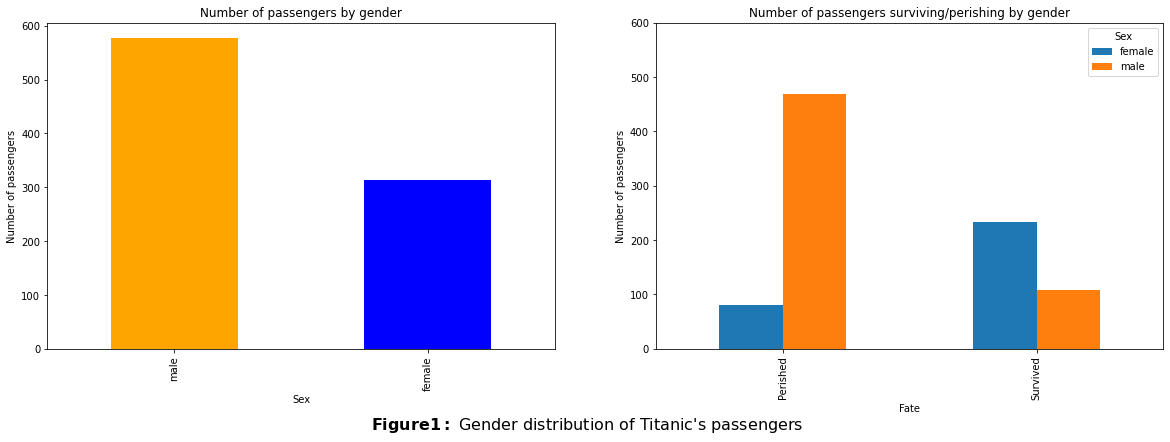

In [6]:
fig = plt.figure() # create figure
fig.set_figwidth(18) # set width
fig.set_figheight(18) # set height
fig.suptitle(r"$\bf{ Figure 1:}$" " Gender distribution of Titanic's passengers", y=-0.03, fontsize=16)

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Bar plot
train_data['Sex'].value_counts().plot(kind='bar', color= ('orange', 'blue'),figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Number of passengers by gender')
ax0.set_xlabel('Sex')
ax0.set_ylabel('Number of passengers')

# Subplot 2: Line plot
survivors.plot(kind='bar', figsize=(20, 6), ax=ax1) # add to subplot 1
ax1.set_title('Number of passengers surviving/perishing by gender')
ax1.set_xlabel('Fate')
ax1.set_ylabel('Number of passengers')
ax1.set_ylim([0,600])

plt.show()

**Analysis:**  We can see that most women traveling on the titanic's maiden voyage survived, while the opposite happened for men; however, some men survived and some women perished, let's see if social class or age had an influence on the fate of these "minority" groups

### Social class of minority groups

#### Women that perished and Men that survived

In [7]:
fate_by_class = train_data.groupby(['Survived','Sex','Pclass']).size().unstack(level=1).reset_index()
fate_by_class['Survived'].replace(to_replace=[0, 1], value=['Perished', 'Survived'], inplace=True)
fate_by_class.set_index('Pclass', inplace=True)

In [8]:
fate_by_class

Sex,Survived,female,male
Pclass,,,
1,Perished,3,77
2,Perished,6,91
3,Perished,72,300
1,Survived,91,45
2,Survived,70,17
3,Survived,72,47


In [9]:
perished = fate_by_class.loc[fate_by_class.Survived == 'Perished']
survived = fate_by_class.loc[fate_by_class.Survived == 'Survived']

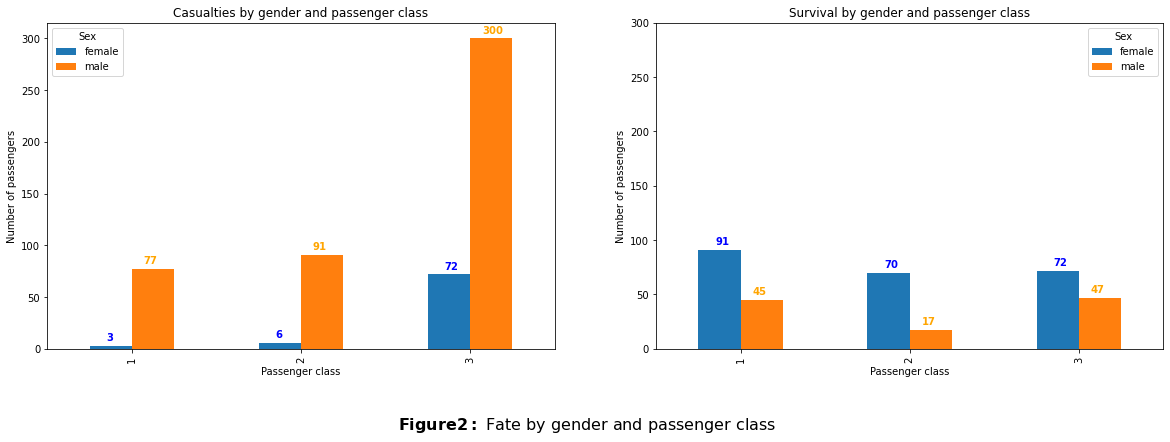

In [10]:
fig2 = plt.figure() # create figure
fig2.set_figwidth(20) # set width
fig2.set_figheight(20) # set height
fig2.suptitle(r"$\bf{ Figure 2:}$" " Fate by gender and passenger class", y=-0.03, fontsize=16)

ax0 = fig2.add_subplot(1, 2, 1) # add subplot 1 (1 row, 1 column, first plot)
ax1 = fig2.add_subplot(1, 2, 2) # add subplot 1 (1 row, 2nd column, second plot)

# Subplot 1: Bar plot
perished.plot(kind='bar',figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Casualties by gender and passenger class')
ax0.set_xlabel('Passenger class')
ax0.set_ylabel('Number of passengers')

#add anotation text for each bar on the 'female' column
for i, v in enumerate(perished['female']):
    ax0.text( i - .15, v + 5, str(v), color='blue', fontweight='bold')
#add anotation text for each bar on the 'male' column
for i, v in enumerate(perished['male']):
    ax0.text( i + .07, v + 5, str(v), color='orange', fontweight='bold')

# Subplot 2: Bar plot
survived.plot(kind='bar',figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title('Survival by gender and passenger class')
ax1.set_xlabel('Passenger class')
ax1.set_ylabel('Number of passengers')
ax1.set_ylim([0,300])

#add anotation text for each bar on the 'female' column
for i, v in enumerate(survived['female']):
    ax1.text( i - .15, v + 5, str(v), color='blue', fontweight='bold')
#add anotation text for each bar on the 'male' column
for i, v in enumerate(survived['male']):
    ax1.text( i + .07, v + 5, str(v), color='orange', fontweight='bold')


plt.show()

**Analysis:** We can see that the highest number of casualities took place among males traveling in third class, where 300 died, and only 47 survived.

In [11]:
survived['Survival_Rate_female_%'] = survived['female']*100/(survived['female']+perished['female'])
survived['Survival_Rate_male_%'] = survived['male']*100/(survived['male']+perished['male']).copy()

In [12]:
survived

Sex,Survived,female,male,Survival_Rate_female_%,Survival_Rate_male_%
Pclass,,,,,
1,Survived,91,45,96.808511,36.885246
2,Survived,70,17,92.105263,15.740741
3,Survived,72,47,50.000000,13.544669


**Analysis**: Based on the table and graphs above, we can see that survival rate is heavily influenced by gender, but also by passenger class. Females where more likely to survive overall than males, but social class also played a role in survival for both genders. 

#### Age of minority groups: Women

Let's analyze the role of age in female passengers' survival rate.

In [13]:
women_per_age = pd.DataFrame(train_data.loc[train_data.Sex=='female'][['Pclass','Survived','Age']])
women_per_age['Survived'].replace(to_replace=[0, 1], value=['Perished', 'Survived'], inplace=True)
women_per_age.sort_values(by='Age', ascending=True, axis=0, inplace=True)

In [14]:
women_per_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 469 to 888
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    314 non-null    int64  
 1   Survived  314 non-null    object 
 2   Age       261 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.8+ KB


In [15]:
women_per_age.dropna(subset=["Age"], axis =0, inplace = True)

In [16]:
women_per_age.head()

,Pclass,Survived,Age
469,3,Survived,0.75
644,3,Survived,0.75
381,3,Survived,1.00
172,3,Survived,1.00
642,3,Perished,2.00


In [17]:
#Get passengers from first class that perished
women_per_age_1_p=pd.DataFrame(women_per_age.loc[(women_per_age.Pclass==1)&(women_per_age.Survived=='Perished')]['Age'])
#Get 'Age' frecuencies, sorted by Age in ascending oder
women_per_age_1_p=pd.DataFrame(women_per_age_1_p.value_counts()).sort_values(by='Age', ascending=True, axis=0)
women_per_age_1_p.reset_index(inplace=True)
#Get passengers from first class that survived
women_per_age_1_s=pd.DataFrame(women_per_age.loc[(women_per_age.Pclass==1)&(women_per_age.Survived=='Survived')]['Age'])
#Get 'Age' frecuencies, sorted by Age in ascending order
women_per_age_1_s=pd.DataFrame(women_per_age_1_s.value_counts()).sort_values(by='Age', ascending=True, axis=0)
women_per_age_1_s.reset_index(inplace=True)

In [18]:
#Repeat for 2nd class
women_per_age_2_p=pd.DataFrame(women_per_age.loc[(women_per_age.Pclass==2)&(women_per_age.Survived=='Perished')]['Age'])
women_per_age_2_p=pd.DataFrame(women_per_age_2_p.value_counts()).sort_values(by='Age', ascending=True, axis=0)
women_per_age_2_p.reset_index(inplace=True)
women_per_age_2_s=pd.DataFrame(women_per_age.loc[(women_per_age.Pclass==2)&(women_per_age.Survived=='Survived')]['Age'])
women_per_age_2_s=pd.DataFrame(women_per_age_2_s.value_counts()).sort_values(by='Age', ascending=True, axis=0)
women_per_age_2_s.reset_index(inplace=True)

#Repeat for 3rd class
women_per_age_3_p=pd.DataFrame(women_per_age.loc[(women_per_age.Pclass==3)&(women_per_age.Survived=='Perished')]['Age'])
women_per_age_3_p=pd.DataFrame(women_per_age_3_p.value_counts()).sort_values(by='Age', ascending=True, axis=0)
women_per_age_3_p.reset_index(inplace=True)
women_per_age_3_s=pd.DataFrame(women_per_age.loc[(women_per_age.Pclass==3)&(women_per_age.Survived=='Survived')]['Age'])
women_per_age_3_s=pd.DataFrame(women_per_age_3_s.value_counts()).sort_values(by='Age', ascending=True, axis=0)
women_per_age_3_s.reset_index(inplace=True)

In [19]:
women_per_age_1_p.set_index('Age',inplace=True)
women_per_age_2_p.set_index('Age',inplace=True)
women_per_age_3_p.set_index('Age',inplace=True)
women_per_age_1_s.set_index('Age',inplace=True)
women_per_age_2_s.set_index('Age',inplace=True)
women_per_age_3_s.set_index('Age',inplace=True)

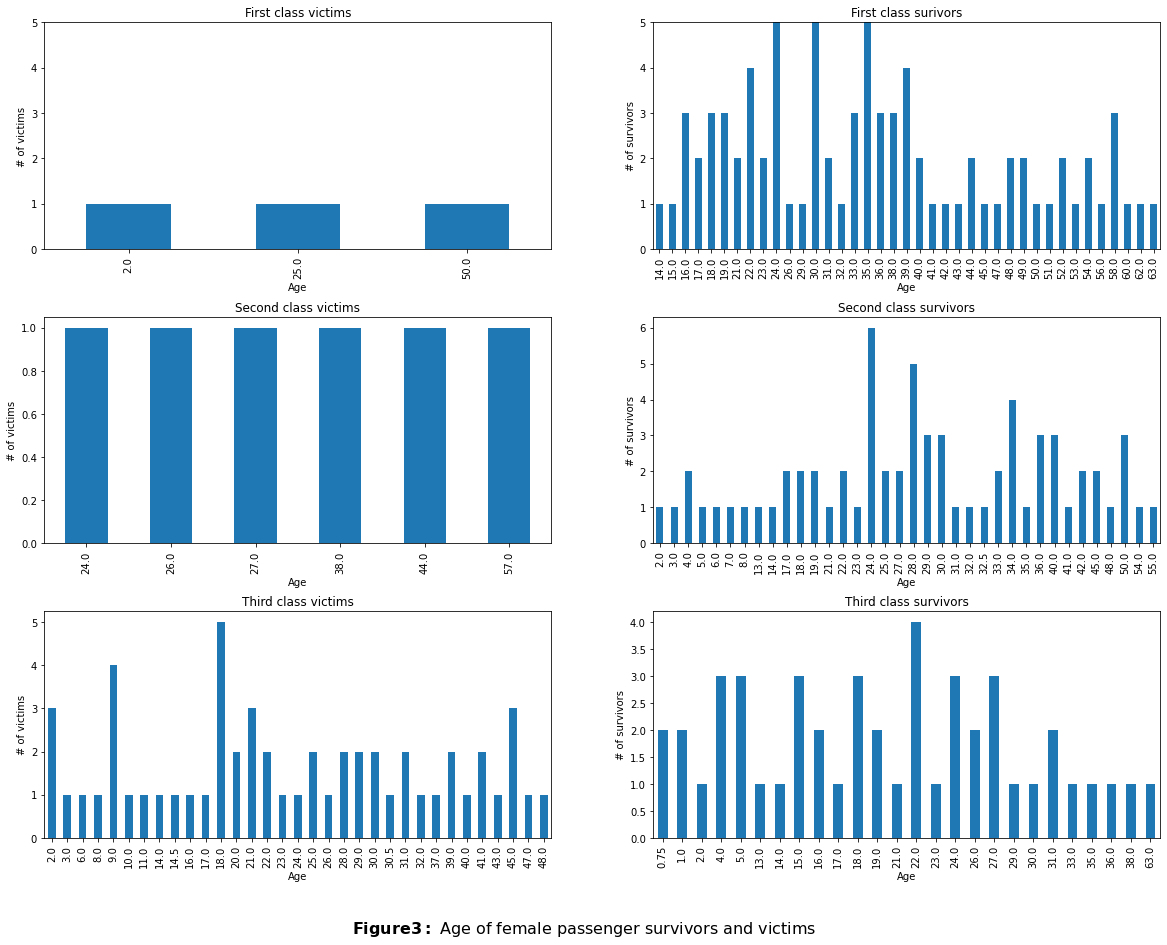

In [62]:
fig3 = plt.figure() # create figure
fig3.set_figwidth(20) # set width
fig3.set_figheight(20) # set height
fig3.suptitle(r"$\bf{ Figure 3:}$" " Age of female passenger survivors and victims", y=0.05, fontsize=16)

ax0 = fig3.add_subplot(3, 2, 1) # add subplot 1 (1 row, 1 column, first plot)
ax1 = fig3.add_subplot(3, 2, 2) # add subplot 1 (1 row, 2nd column, second plot)
ax2 = fig3.add_subplot(3, 2, 3) 
ax3 = fig3.add_subplot(3, 2, 4) 
ax4 = fig3.add_subplot(3, 2, 5) 
ax5 = fig3.add_subplot(3, 2, 6) 

# Subplot 1: Bar plot
women_per_age_1_p.plot(kind='bar',figsize=(20, 15), legend=False, ax=ax0) # add to subplot 1
ax0.set_title('First class victims')
ax0.set_xlabel('Age')
ax0.set_ylabel('# of victims')
ax0.set_ylim([0,5])

# Subplot 2: Bar plot
women_per_age_1_s.plot(kind='bar',figsize=(20, 15), legend=False, ax=ax1) 
ax1.set_title('First class surivors')
ax1.set_xlabel('Age')
ax1.set_ylabel('# of survivors')
ax1.set_ylim([0,5])

# Subplot 3: Bar plot
women_per_age_2_p.plot(kind='bar',figsize=(20, 15), legend=False, ax=ax2) 
ax2.set_title('Second class victims')
ax2.set_xlabel('Age')
ax2.set_ylabel('# of victims')

# Subplot 4: Bar plot
women_per_age_2_s.plot(kind='bar',figsize=(20, 15), legend=False, ax=ax3) 
ax3.set_title('Second class survivors')
ax3.set_xlabel('Age')
ax3.set_ylabel('# of survivors')

# Subplot 5: Bar plot
women_per_age_3_p.plot(kind='bar',figsize=(20, 15), legend=False, ax=ax4) 
ax4.set_title('Third class victims')
ax4.set_xlabel('Age')
ax4.set_ylabel('# of victims')

# Subplot 6: Bar plot
women_per_age_3_s.plot(kind='bar',figsize=(20, 15), legend=False, ax=ax5) 
ax5.set_title('Third class survivors')
ax5.set_xlabel('Age')
ax5.set_ylabel('# of survivors')

plt.subplots_adjust(hspace = 0.3)
plt.show()

#### Age of minority groups: men

Let's do the same but now for male passengers.

In [21]:
men_per_age = pd.DataFrame(train_data.loc[train_data.Sex=='male'][['Pclass','Survived','Age']])
men_per_age['Survived'].replace(to_replace=[0, 1], value=['Perished', 'Survived'], inplace=True)
men_per_age.sort_values(by='Age', ascending=True, axis=0, inplace=True)

In [29]:
men_per_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 803 to 878
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    577 non-null    int64  
 1   Survived  577 non-null    object 
 2   Age       453 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 18.0+ KB


In [30]:
men_per_age.dropna(subset=["Age"], axis =0, inplace = True)
men_per_age.head()

,Pclass,Survived,Age
803,3,Survived,0.42
755,2,Survived,0.67
831,2,Survived,0.83
78,2,Survived,0.83
305,1,Survived,0.92


In [31]:
#Get passengers from first class that perished
men_per_age_1_p=pd.DataFrame(men_per_age.loc[(men_per_age.Pclass==1)&(men_per_age.Survived=='Perished')]['Age'])
#Get 'Age' frecuencies, sorted by Age in ascending oder
men_per_age_1_p=pd.DataFrame(men_per_age_1_p.value_counts()).sort_values(by='Age', ascending=True, axis=0)
men_per_age_1_p.reset_index(inplace=True)
#Get passengers from first class that survived
men_per_age_1_s=pd.DataFrame(men_per_age.loc[(men_per_age.Pclass==1)&(men_per_age.Survived=='Survived')]['Age'])
#Get 'Age' frecuencies, sorted by Age in ascending order
men_per_age_1_s=pd.DataFrame(men_per_age_1_s.value_counts()).sort_values(by='Age', ascending=True, axis=0)
men_per_age_1_s.reset_index(inplace=True)

In [32]:
#Repeat for 2nd class
men_per_age_2_p=pd.DataFrame(men_per_age.loc[(men_per_age.Pclass==2)&(men_per_age.Survived=='Perished')]['Age'])
men_per_age_2_p=pd.DataFrame(men_per_age_2_p.value_counts()).sort_values(by='Age', ascending=True, axis=0)
men_per_age_2_p.reset_index(inplace=True)
men_per_age_2_s=pd.DataFrame(men_per_age.loc[(men_per_age.Pclass==2)&(men_per_age.Survived=='Survived')]['Age'])
men_per_age_2_s=pd.DataFrame(men_per_age_2_s.value_counts()).sort_values(by='Age', ascending=True, axis=0)
men_per_age_2_s.reset_index(inplace=True)

#Repeat for 3rd class
men_per_age_3_p=pd.DataFrame(men_per_age.loc[(men_per_age.Pclass==3)&(men_per_age.Survived=='Perished')]['Age'])
men_per_age_3_p=pd.DataFrame(men_per_age_3_p.value_counts()).sort_values(by='Age', ascending=True, axis=0)
men_per_age_3_p.reset_index(inplace=True)
men_per_age_3_s=pd.DataFrame(men_per_age.loc[(men_per_age.Pclass==3)&(men_per_age.Survived=='Survived')]['Age'])
men_per_age_3_s=pd.DataFrame(men_per_age_3_s.value_counts()).sort_values(by='Age', ascending=True, axis=0)
men_per_age_3_s.reset_index(inplace=True)

In [33]:
men_per_age_1_p.set_index('Age',inplace=True)
men_per_age_2_p.set_index('Age',inplace=True)
men_per_age_3_p.set_index('Age',inplace=True)
men_per_age_1_s.set_index('Age',inplace=True)
men_per_age_2_s.set_index('Age',inplace=True)
men_per_age_3_s.set_index('Age',inplace=True)

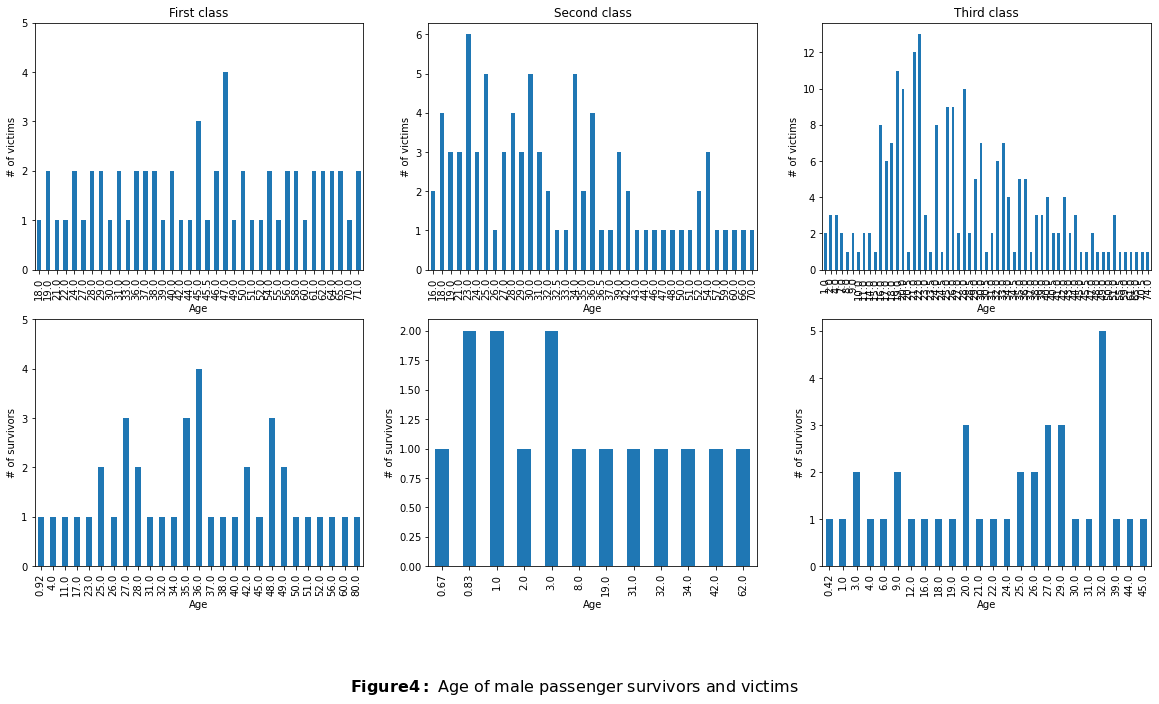

In [34]:
fig4 = plt.figure() # create figure
fig4.set_figwidth(20) # set width
fig4.set_figheight(40) # set height
fig4.suptitle(r"$\bf{ Figure 4:}$" " Age of male passenger survivors and victims", y=-0.03, fontsize=16)

ax0 = fig4.add_subplot(2, 3, 1) # add subplot 1 (1 row, 1 column, first plot)
ax1 = fig4.add_subplot(2, 3, 2) # add subplot 1 (1 row, 2nd column, second plot)
ax2 = fig4.add_subplot(2, 3, 3) 
ax3 = fig4.add_subplot(2, 3, 4) 
ax4 = fig4.add_subplot(2, 3, 5) 
ax5 = fig4.add_subplot(2, 3, 6) 

# Subplot 1: Bar plot
men_per_age_1_p.plot(kind='bar',figsize=(20, 20), legend=False, ax=ax0) # add to subplot 1
ax0.set_title('First class')
ax0.set_xlabel('Age')
ax0.set_ylabel('# of victims')
ax0.set_ylim([0,5])

# Subplot 2: Bar plot
men_per_age_2_p.plot(kind='bar',figsize=(20, 6), legend=False, ax=ax1) # add to subplot 1
ax1.set_title('Second class')
ax1.set_xlabel('Age')
ax1.set_ylabel('# of victims')

# Subplot 3: Bar plot
men_per_age_3_p.plot(kind='bar',figsize=(20, 10), legend=False, ax=ax2) # add to subplot 1
ax2.set_title('Third class')
ax2.set_xlabel('Age')
ax2.set_ylabel('# of victims')

# Subplot 4: Bar plot
men_per_age_1_s.plot(kind='bar',figsize=(20, 6), legend=False, ax=ax3) # add to subplot 1
ax3.set_xlabel('Age')
ax3.set_ylabel('# of survivors')
ax3.set_ylim([0,5])

# Subplot 2: Bar plot
men_per_age_2_s.plot(kind='bar',figsize=(20, 6), legend=False, ax=ax4) # add to subplot 1
ax4.set_xlabel('Age')
ax4.set_ylabel('# of survivors')

# Subplot 3: Bar plot
men_per_age_3_s.plot(kind='bar',figsize=(20, 10), legend=False, ax=ax5) # add to subplot 1
ax5.set_xlabel('Age')
ax5.set_ylabel('# of survivors')

plt.show()